In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

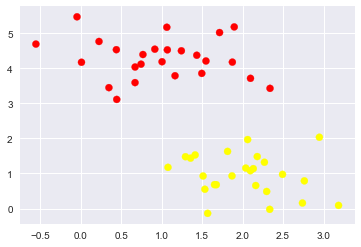

In [52]:
X, Y = make_blobs(n_samples=50,centers=2,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

## Max-min the margin

(-1, 3.5)

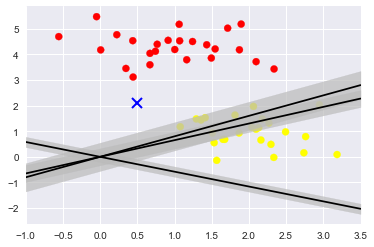

In [53]:
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.1],'x',color="blue",markersize=10,markeredgewidth=2)
for a, b, d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yy = a * xx * b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx,yy-d,yy+d,edgecolor='none',color="#BBBBBB",alpha=0.7)
plt.xlim(-1,3.5)

### Creation a model SVM

In [54]:
from sklearn.svm import SVC

In [55]:
model = SVC(kernel="linear",C= 1e10)
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
def plot_SVC(model,ax=None, plot_support=True):
    """Plot 2D decision with SVC"""
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ##Create the points to evaluated the model
    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(xlim[0],ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel(),]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Boundary and margins SVC
    ax.contour(X,Y,P,colors="k",levels=[-1,0,1], alpha = 0.5, linestyles=["--","-","--"])
    print model.support_vectors_
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1, facecolors="white")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


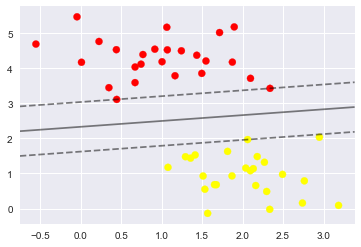

In [57]:
plt.scatter(X[:,0],X[:,1], c = Y, s=50, cmap = "autumn")
plot_SVC(model,plot_support=False)

In [70]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0,cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1], c=Y, s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_SVC(model,ax)

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


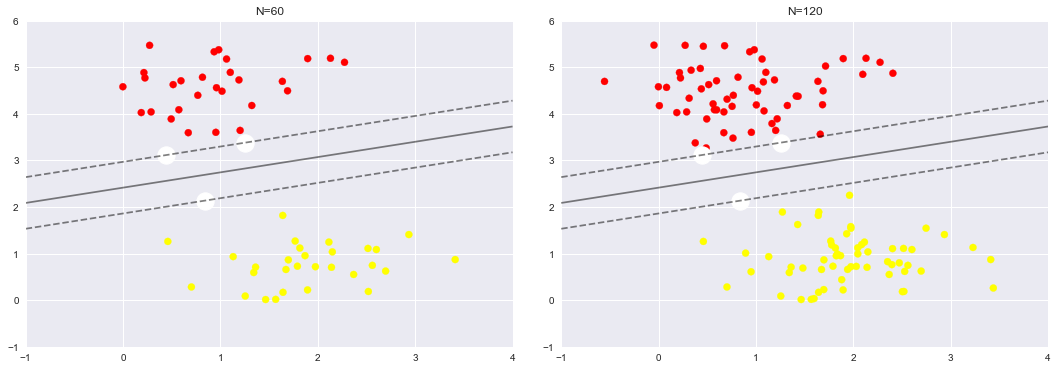

In [72]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for ax_i, N , in zip(ax,[60,120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [73]:
from ipywidgets import interact, fixed

In [74]:
interact(plot_svm,N=[10,200],ax=fixed(None))

interactive(children=(Dropdown(description=u'N', options=(10, 200), value=10), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_svm>